In [20]:
import os
from tqdm import tqdm
import numpy as np
from deepface import DeepFace

In [32]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]

path="sorted_data/Clean/amarisian_0109.jpeg"
filename=path.split('/')[-1]

#face detection and alignment
face_objs = DeepFace.extract_faces(img_path=path, 
        target_size = (224, 224), 
        detector_backend = backends[4]
)

In [53]:
import numpy as np

# print(face_objs[0]['face'])
print(filename)
print(type(face_objs[0]['face'][0][0][0]))
cropped_array = (face_objs[0]['face'] * 255).astype(np.uint8)

img = Image.fromarray(cropped_array)

amarisian_0109.jpeg
<class 'numpy.float32'>


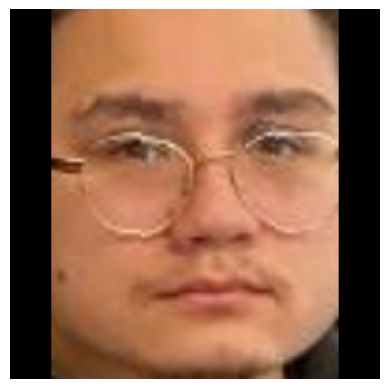

In [39]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_array = np.array(face_objs[0]['face'])
h, w, _ = image_array.shape

# Display the image using mpimg

plt.imshow(image_array)
plt.axis('off')  # Turn off axis
plt.savefig(filename, bbox_inches='tight', pad_inches=0)

plt.show()


In [37]:
img = Image.open(filename)
vec = np.array(img)

vec.shape

(369, 369, 3)

In [15]:
def get_embeddings(img_path):
    backends = [
    'opencv', 
    'ssd', 
    'dlib', 
    'mtcnn', 
    'retinaface', 
    'mediapipe',
    'yolov8',
    'yunet',
    'fastmtcnn',
    ]

    embedding_objs = DeepFace.represent(img_path=img_path, 
            detector_backend = backends[2]
    )

    return np.array(embedding_objs[0]['embedding'])



In [21]:
emb_vecs = []
path = 'training/oraisisaac'
for img in tqdm(os.listdir(path)):
    img_path = os.path.join(path, img)
    emb_vec = get_embeddings(img_path)
    emb_vecs.append(emb_vec)

100%|██████████| 333/333 [00:53<00:00,  6.20it/s]


In [24]:
X = np.array(emb_vecs)
X.shape

(333, 4096)